In [1]:
import copy
import re
import csv
import codecs
from random import shuffle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# from nltk.corpus import floresta as flt
# from nltk.corpus import mac_morpho as mcm

from utils import load_six_emotions, load_3_emotions, generate_corpus
from unsupervised.emotional_lsa import EmotionalLSA

np.random.seed(12345)

%matplotlib inline

In [2]:
# Create a function called "chunks" with two arguments, l and n:
def chunks(l, n):
    # For item i in a range that is a length of l,
    for i in range(0, len(l), n):
        # Create an index range for l of n items:
        yield l[i:i+n]


print('Loading emotional words: ')
emotion_words = load_six_emotions('/home/estagiario/Projetos/github/sentiment-analysis-2018-president-election/dataset/emocoes')
emotion_words_n = load_3_emotions('/home/estagiario/Projetos/github/sentiment-analysis-2018-president-election/dataset/emocoes')
emotion_words['NEUTRO'] = emotion_words_n['NEUTRO']

rep = [
    ('\n', '. '), ('"', ''), ('@', ''), 
    ('#', ''), ('RT', ''), (r'(http[s]*?:\/\/)+.*[\r\n]*', '')
]

Loading emotional words: 


## Validação 1

Validaremos o algoritmo, adicionando o em uma das 6 emoções definidas + 1 neutro.

Utilizaremos uma base com aproximadamente 3000 frases diversas.

In [3]:
# with open('/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/dataset/frases.txt') as h:
with open('/home/estagiario/Projetos/github/sentiment-analysis-2018-president-election/dataset/frases.txt') as h:
    original_phrases = h.readlines()
original_phrases = original_phrases[:1500]
phrases = copy.deepcopy(original_phrases)
# phrases += [' '.join(f).replace('_', ' ') for f in flt.sents()[:2000]]
# phrases += [' '.join(f).replace('_', ' ') for f in mch.sents()[:2000]]
# phrases += [' '.join(f).replace('_', ' ') for f in mcm.sents()[:2000]]
phrases = generate_corpus(phrases)
ldocs = [f'D{i}' for i in range(len(original_phrases))]

In [4]:
print('Starting EmotionalLSA model...')
model = EmotionalLSA(debug=True)
print('fit and transform...')
predicted = model.fit_transform(phrases, copy.deepcopy(emotion_words))

Starting EmotionalLSA model...
fit and transform...
using Count...
Actual number of features: 4087
--- 0.04250049591064453 seconds ---
Calculating SVD...
--- 6.8561625480651855 seconds ---
Processing emotional state... this may take a while...
--- 0.0013878345489501953 seconds ---
Generating emotional state from lexicon...
--- 7.546880006790161 seconds ---
Calculating final emotional matrix...
--- 2.7826876640319824 seconds ---


In [5]:
df = pd.DataFrame(predicted[:len(original_phrases)], index=ldocs, columns=emotion_words.keys())

D0 - "A alma jamais pode vaguear sem rumo, se tomar a Bíblia para lhe guiar os passos."

D1 - "A religiao é o que impede o pobre de matar o rico.

D2 - "Circunstâncias? O que são as circunstâncias? Eu sou as circunstâncias!"

D3 - "Que felicidade a Bíblia proporciona àqueles que acreditam nela! Que maravilhas admiram aqueles que refletem nela! "

D4 - 30 de Janeiro de 1933 será lembrado como o dia em que o povo se tornou novamente o dono desta nação.

D5 - A adolescência é como uma casa em dia de mudanças: Uma desordem temporária.

D6 - A adversidade desperta em nós capacidades que, em circunstâncias favoráveis, teriam ficado adormecidas.

D7 - A adversidade põe à prova os espíritos.



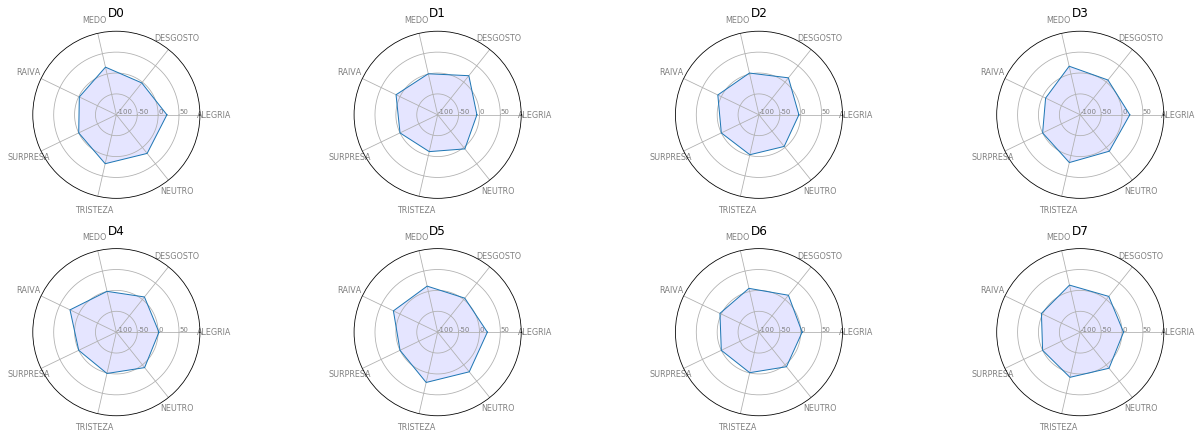

In [6]:
categories = list(df)
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(18, 12))
for m in range(8):
    idx = m + 1
    
    values = df.loc[f'D{m}'].values
    values = np.append(values, values[0])
    print(f'D{m} - {original_phrases[m]}')
    # Initialise the spider plot
    ax = plt.subplot(4, 4, idx, polar=True)
    # Title
    plt.title(f'D{m}')
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks(range(-100, 100, 50), [f'{i}' for i in range(-100, 100, 50)], color="grey", size=7)
    plt.ylim(-100, 100)
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

plt.tight_layout()
plt.show()

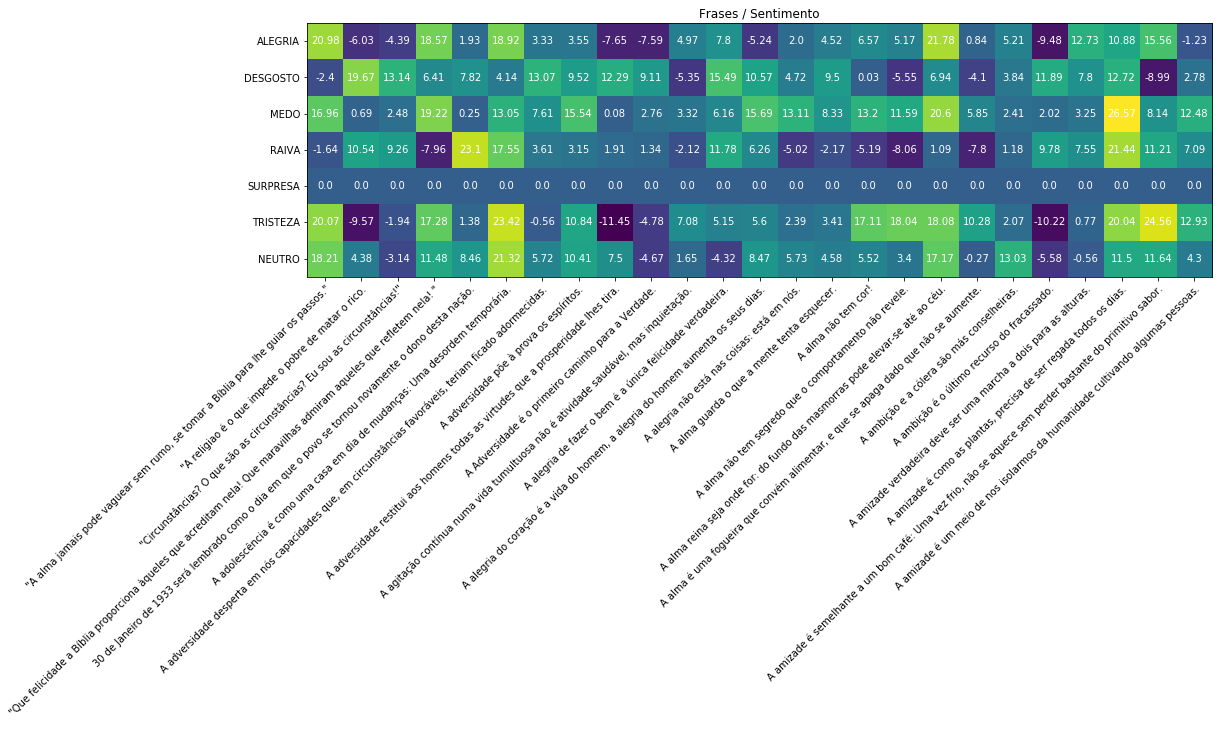

In [7]:
N = 25

categories = list(df)
k_phrases = original_phrases[:N] # [f'D{i}' for i in range(len(original_phrases[:N]))]
values = df[:N].values.T

fig, ax = plt.subplots(1, 1, figsize=(17, 17))
im = ax.imshow(values)

# We want to show all ticks...
ax.set_xticks(np.arange(len(k_phrases)))
ax.set_yticks(np.arange(len(categories)))
# ... and label them with the respective list entries
ax.set_xticklabels(k_phrases)
ax.set_yticklabels(categories)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for j in range(len(categories)):
    for i in range(len(k_phrases)):
        text = ax.text(i, j, values[j, i],
                       ha="center", va="center", color="w")

ax.set_title("Frases / Sentimento")
fig.tight_layout()
plt.show()

In [8]:
for i, frase in enumerate(original_phrases[:10]):
    print('-' * 20)
    print(f'D{i} - {frase}')
    print(df.loc[f'D{i}'])

--------------------
D0 - "A alma jamais pode vaguear sem rumo, se tomar a Bíblia para lhe guiar os passos."

ALEGRIA     20.98
DESGOSTO    -2.40
MEDO        16.96
RAIVA       -1.64
SURPRESA     0.00
TRISTEZA    20.07
NEUTRO      18.21
Name: D0, dtype: float64
--------------------
D1 - "A religiao é o que impede o pobre de matar o rico.

ALEGRIA     -6.03
DESGOSTO    19.67
MEDO         0.69
RAIVA       10.54
SURPRESA     0.00
TRISTEZA    -9.57
NEUTRO       4.38
Name: D1, dtype: float64
--------------------
D2 - "Circunstâncias? O que são as circunstâncias? Eu sou as circunstâncias!"

ALEGRIA     -4.39
DESGOSTO    13.14
MEDO         2.48
RAIVA        9.26
SURPRESA     0.00
TRISTEZA    -1.94
NEUTRO      -3.14
Name: D2, dtype: float64
--------------------
D3 - "Que felicidade a Bíblia proporciona àqueles que acreditam nela! Que maravilhas admiram aqueles que refletem nela! "

ALEGRIA     18.57
DESGOSTO     6.41
MEDO        19.22
RAIVA       -7.96
SURPRESA     0.00
TRISTEZA    17.28
NEUTRO

## Validação 2

Utilizaremos os mesmos dados, entretanto agora categorizaremos as frases acima, nas categorias POSITIVO, NEGATIVO e NEUTRO.

In [9]:
print('Starting EmotionalLSA model...')
model = EmotionalLSA(debug=True)
print('fit and transform...')
predicted = model.fit_transform(phrases, copy.deepcopy(emotion_words_n))
    
size = len(original_phrases)
df = pd.DataFrame(predicted, index=ldocs, columns=emotion_words_n.keys())

Starting EmotionalLSA model...
fit and transform...
using Count...
Actual number of features: 4087
--- 0.046998023986816406 seconds ---
Calculating SVD...
--- 7.235065698623657 seconds ---
Processing emotional state... this may take a while...
--- 0.0025358200073242188 seconds ---
Generating emotional state from lexicon...
--- 13.0271577835083 seconds ---
Calculating final emotional matrix...
--- 1.2030298709869385 seconds ---


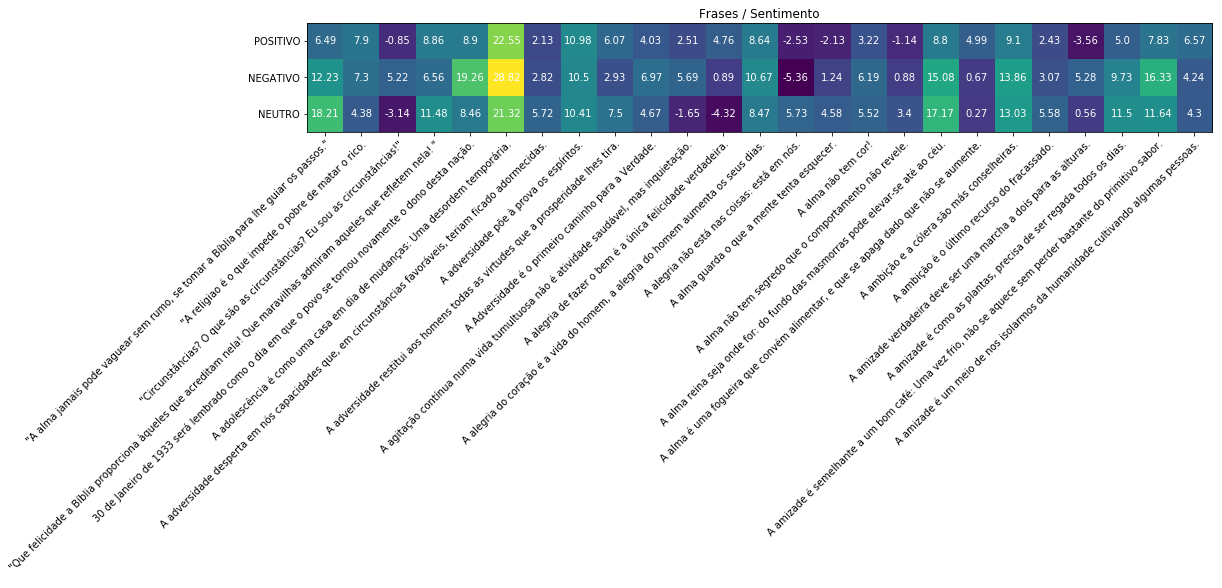

In [10]:
N = 25

categories = list(df)
k_phrases = original_phrases[:N] # [f'D{i}' for i in range(len(original_phrases[:N]))]
values = df[:N].values.T

fig, ax = plt.subplots(1, 1, figsize=(17, 17))
im = ax.imshow(values)

# We want to show all ticks...
ax.set_xticks(np.arange(len(k_phrases)))
ax.set_yticks(np.arange(len(categories)))
# ... and label them with the respective list entries
ax.set_xticklabels(k_phrases)
ax.set_yticklabels(categories)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for j in range(len(categories)):
    for i in range(len(k_phrases)):
        text = ax.text(i, j, values[j, i],
                       ha="center", va="center", color="w")

ax.set_title("Frases / Sentimento")
fig.tight_layout()
plt.show()

D0 - "A alma jamais pode vaguear sem rumo, se tomar a Bíblia para lhe guiar os passos."

D1 - "A religiao é o que impede o pobre de matar o rico.

D2 - "Circunstâncias? O que são as circunstâncias? Eu sou as circunstâncias!"

D3 - "Que felicidade a Bíblia proporciona àqueles que acreditam nela! Que maravilhas admiram aqueles que refletem nela! "

D4 - 30 de Janeiro de 1933 será lembrado como o dia em que o povo se tornou novamente o dono desta nação.

D5 - A adolescência é como uma casa em dia de mudanças: Uma desordem temporária.

D6 - A adversidade desperta em nós capacidades que, em circunstâncias favoráveis, teriam ficado adormecidas.

D7 - A adversidade põe à prova os espíritos.

D8 - A adversidade restitui aos homens todas as virtudes que a prosperidade lhes tira.

D9 - A Adversidade é o primeiro caminho para a Verdade.

D10 - A agitação contínua numa vida tumultuosa não é atividade saudável, mas inquietação.

D11 - A alegria de fazer o bem é a única felicidade verdadeira.

D12 -

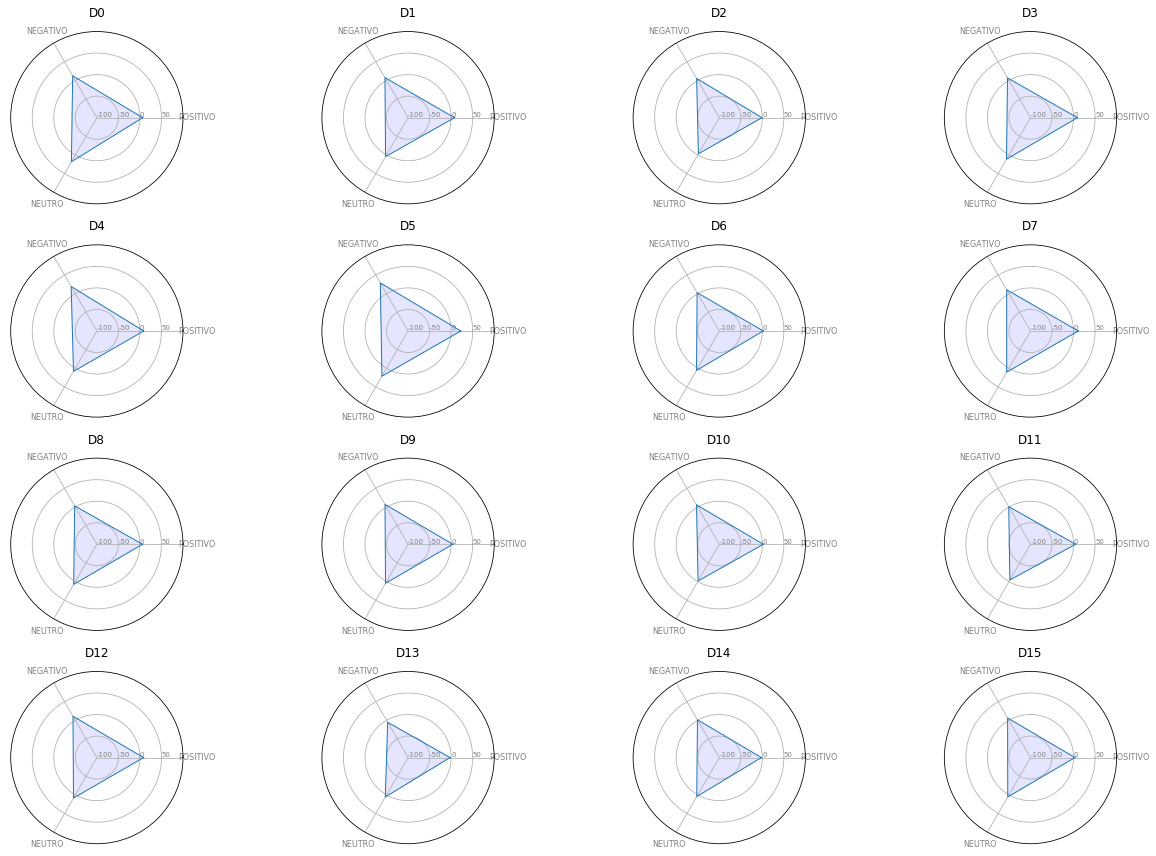

In [11]:
categories = list(df)
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(18, 12))
for m in range(16):
    idx = m + 1
    
    values = df.loc[f'D{m}'].values
    values = np.append(values, values[0])
    print(f'D{m} - {original_phrases[m]}')
    # Initialise the spider plot
    ax = plt.subplot(4, 4, idx, polar=True)
    # Title
    plt.title(f'D{m}')
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks(range(-100, 100, 50), [f'{i}' for i in range(-100, 100, 50)], color="grey", size=7)
    plt.ylim(-100, 100)
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

plt.tight_layout()
plt.show()

In [12]:
for i, frase in enumerate(original_phrases[:25]):
    print('-' * 20)
    print(f'D{i} - {frase}')
    print(df.loc[f'D{i}'])

--------------------
D0 - "A alma jamais pode vaguear sem rumo, se tomar a Bíblia para lhe guiar os passos."

POSITIVO     6.49
NEGATIVO    12.23
NEUTRO      18.21
Name: D0, dtype: float64
--------------------
D1 - "A religiao é o que impede o pobre de matar o rico.

POSITIVO    7.90
NEGATIVO    7.30
NEUTRO      4.38
Name: D1, dtype: float64
--------------------
D2 - "Circunstâncias? O que são as circunstâncias? Eu sou as circunstâncias!"

POSITIVO   -0.85
NEGATIVO    5.22
NEUTRO     -3.14
Name: D2, dtype: float64
--------------------
D3 - "Que felicidade a Bíblia proporciona àqueles que acreditam nela! Que maravilhas admiram aqueles que refletem nela! "

POSITIVO     8.86
NEGATIVO     6.56
NEUTRO      11.48
Name: D3, dtype: float64
--------------------
D4 - 30 de Janeiro de 1933 será lembrado como o dia em que o povo se tornou novamente o dono desta nação.

POSITIVO     8.90
NEGATIVO    19.26
NEUTRO       8.46
Name: D4, dtype: float64
--------------------
D5 - A adolescência é como um

## Validação 

Validaremos o algoritmo em uma base de 40000 tweets coletados. Categorizaremos em POSITIVO, NEGATIVO e NEUTRO.

In [28]:
original_tweets = []
sents = []
filename = '/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/dataset/tweets-tratados-polaridade-10-10-2018.csv'
with open(filename, 'r') as h:
    reader = csv.reader(h, delimiter='|')
    for row in reader:
        tweet = row[1]
        tweet_sent = row[2]
        for o, r in rep:
            tweet = re.sub(o, r, tweet, flags=re.MULTILINE)
        if len(tweet) > 5:
            original_tweets += [tweet]
            sents += [tweet_sent]        

print('Starting NLP clean up...')
tweets = generate_corpus(original_tweets[:2000])
ltweets = [f'D{i}' for i in range(len(tweets))]

Starting NLP clean up...


In [29]:
print('Starting EmotionalLSA model...')
model = EmotionalLSA(debug=True)
print('fit and transform...')
predicted = model.fit_transform(tweets, copy.deepcopy(emotion_words_n))

Starting EmotionalLSA model...
fit and transform...
using Count...
Actual number of features: 4405
--- 0.036041975021362305 seconds ---
Calculating SVD...
--- 8.907025814056396 seconds ---
Processing emotional state... this may take a while...
--- 0.0015337467193603516 seconds ---
Generating emotional state from lexicon...
--- 30.74543523788452 seconds ---
Calculating final emotional matrix...
--- 1.00612211227417 seconds ---


In [30]:
df = pd.DataFrame(predicted, index=ltweets, columns=emotion_words_n.keys())

### Acurácia

In [31]:
accuracy = 0
change_sent = [('POSITIVE', 'POSITIVO'), ('NEGATIVE', 'NEGATIVO'), ('NEUTRAL', 'NEUTRO')]
for i, frase in enumerate(tweets):
    for org, new in change_sent:
        sentimento_original = sents[i].upper()
        if sentimento_original == org:
            sentimento_original = new
            break
    calculado = df.loc[f'D{i}'].idxmax(axis=1)
    if sentimento_original == calculado:
        accuracy += 1
accuracy = np.round((accuracy / len(tweets)) * 100)
print(f'Accuracy: {accuracy}%')

Accuracy: 34.0%


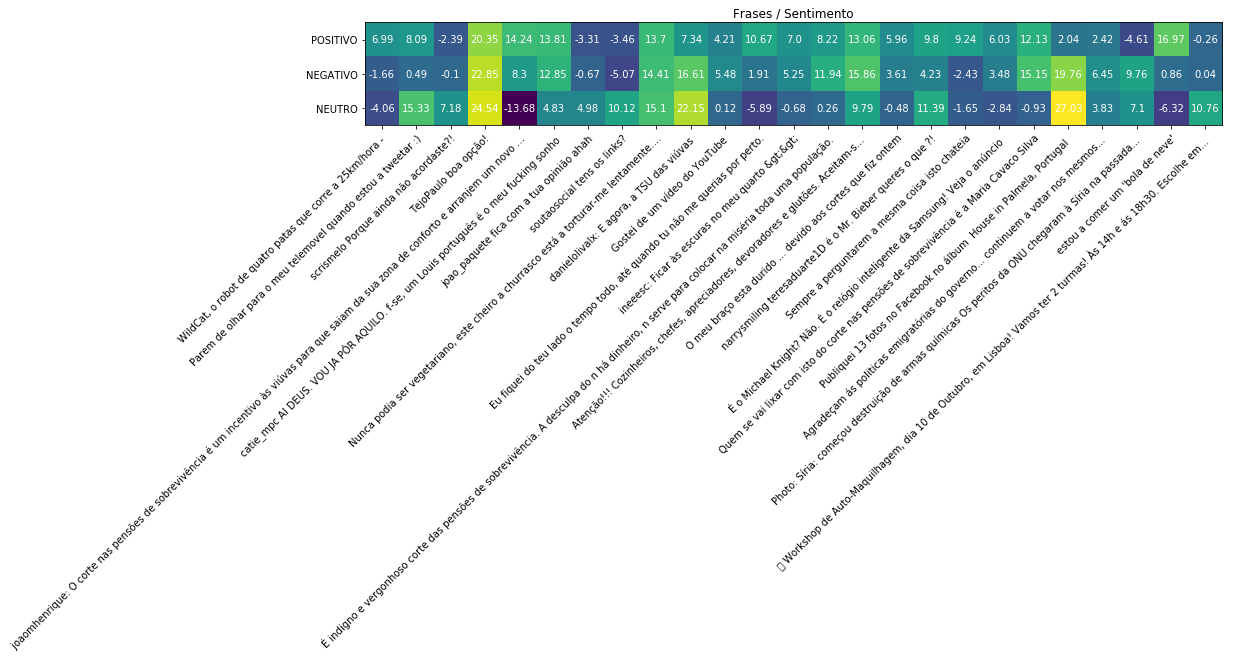

In [32]:
N = 25

categories = list(df)
k_phrases = original_tweets[:N] # [f'D{i}' for i in range(len(original_phrases[:N]))]
values = df[:N].values.T

fig, ax = plt.subplots(1, 1, figsize=(17, 17))
im = ax.imshow(values)

# We want to show all ticks...
ax.set_xticks(np.arange(len(k_phrases)))
ax.set_yticks(np.arange(len(categories)))
# ... and label them with the respective list entries
ax.set_xticklabels(k_phrases)
ax.set_yticklabels(categories)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for j in range(len(categories)):
    for i in range(len(k_phrases)):
        text = ax.text(i, j, values[j, i],
                       ha="center", va="center", color="w")

ax.set_title("Frases / Sentimento")
fig.tight_layout()
plt.show()

In [33]:
for i, frase in enumerate(original_tweets[:25]):
    print('-' * 20)
    calculado = df.loc[f'D{i}'].idxmax(axis=1)
    print(f'D{i} - {frase}')
    print(f'ORIGINAL : {sents[i].upper()}')
    print(f'CALCULADO : {calculado}')
    print(df.loc[f'D{i}'])

--------------------
D0 - WildCat, o robot de quatro patas que corre a 25km/hora - 
ORIGINAL : NEUTRAL
CALCULADO : POSITIVO
POSITIVO    6.99
NEGATIVO   -1.66
NEUTRO     -4.06
Name: D0, dtype: float64
--------------------
D1 - Parem de olhar para o meu telemovel quando estou a tweetar :)
ORIGINAL : POSITIVE
CALCULADO : NEUTRO
POSITIVO     8.09
NEGATIVO     0.49
NEUTRO      15.33
Name: D1, dtype: float64
--------------------
D2 - scrismelo Porque ainda não acordaste?!
ORIGINAL : NEUTRAL
CALCULADO : NEUTRO
POSITIVO   -2.39
NEGATIVO   -0.10
NEUTRO      7.18
Name: D2, dtype: float64
--------------------
D3 - TejoPaulo boa opção!
ORIGINAL : NEUTRAL
CALCULADO : NEUTRO
POSITIVO    20.35
NEGATIVO    22.85
NEUTRO      24.54
Name: D3, dtype: float64
--------------------
D4 -  joaomhenrique: O corte nas pensões de sobrevivência é um incentivo às viúvas para que saiam da sua zona de conforto e arranjem um novo …
ORIGINAL : NEUTRAL
CALCULADO : POSITIVO
POSITIVO    14.24
NEGATIVO     8.30
NEUTRO     

### Validação 4

In [34]:
original_tweets = []
sents = []
filename = '/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/dataset/tweets_mg2.csv'
with open(filename, 'r') as h:
    reader = csv.reader(h, delimiter='|')
    for row in reader:
        tweet = row[2]
        tweet_sent = row[9]
        for o, r in rep:
            tweet = re.sub(o, r, tweet, flags=re.MULTILINE)
        if len(tweet) > 5:
            original_tweets += [tweet]
            sents += [tweet_sent]

print('Starting NLP clean up...')
tweets = generate_corpus(original_tweets[:2000])
ltweets = [f'D{i}' for i in range(len(tweets))]

Starting NLP clean up...


In [35]:
for inter_phrases in chunks(tweets, 500):
    inter_ltweets = [f'D{i}' for i in range(len(inter_phrases))]
    print('Starting EmotionalLSA model...')
    model = EmotionalLSA(debug=False)
    print('fit and transform...')
    predicted = model.fit_transform(inter_phrases, copy.deepcopy(emotion_words_n))
    df = pd.DataFrame(predicted, index=inter_ltweets, columns=emotion_words_n.keys())
    
    accuracy = 0
    for i, frase in enumerate(inter_phrases):
        sentimento_original = sents[i].upper()
        calculado = df.loc[f'D{i}'].idxmax(axis=1)
        if sentimento_original == calculado:
            accuracy += 1
    accuracy = np.round((accuracy / len(inter_phrases)) * 100, 2)
    print(f'Accuracy: {accuracy}%')

Starting EmotionalLSA model...
fit and transform...
Accuracy: 38.0%
Starting EmotionalLSA model...
fit and transform...
Accuracy: 44.6%
Starting EmotionalLSA model...
fit and transform...
Accuracy: 29.2%
Starting EmotionalLSA model...
fit and transform...
Accuracy: 38.0%


In [36]:
print('Starting EmotionalLSA model...')
model = EmotionalLSA(debug=True)
print('fit and transform...')
predicted = model.fit_transform(tweets, emotion_words_n)

Starting EmotionalLSA model...
fit and transform...
using Count...
Actual number of features: 3454
--- 0.1300029754638672 seconds ---
Calculating SVD...
--- 8.703744888305664 seconds ---
Processing emotional state... this may take a while...
--- 0.0016524791717529297 seconds ---
Generating emotional state from lexicon...
--- 20.61476182937622 seconds ---
Calculating final emotional matrix...
--- 0.9837639331817627 seconds ---


In [37]:
df = pd.DataFrame(predicted, index=ltweets, columns=emotion_words_n.keys())

In [38]:
accuracy = 0
for i, frase in enumerate(tweets):
    sentimento_original = sents[i].upper()
    calculado = df.loc[f'D{i}'].idxmax(axis=1)
    if sentimento_original == calculado:
        accuracy += 1
accuracy = np.round((accuracy / len(tweets)) * 100, 2)
print(f'Accuracy: {accuracy}%')

Accuracy: 33.55%


In [39]:
for i, frase in enumerate(original_tweets[:25]):
    print('-' * 20)
    calculado = df.loc[f'D{i}'].idxmax(axis=1)
    print(f'D{i} - {frase}')
    print(f'ORIGINAL : {sents[i].upper()}')
    print(f'CALCULADO : {calculado}')
    print(df.loc[f'D{i}'])

--------------------
D0 - ���⛪  Catedral de Santo Antônio - Governador Valadares/MG 
ORIGINAL : NEUTRO
CALCULADO : NEUTRO
POSITIVO    14.71
NEGATIVO    19.24
NEUTRO      26.48
Name: D0, dtype: float64
--------------------
D1 - �  Governador Valadares, Minas Gerais 
ORIGINAL : NEUTRO
CALCULADO : NEUTRO
POSITIVO    10.91
NEGATIVO    38.47
NEUTRO      47.96
Name: D1, dtype: float64
--------------------
D2 - ��  Governador Valadares, Minas Gerais 
ORIGINAL : NEUTRO
CALCULADO : NEUTRO
POSITIVO    10.91
NEGATIVO    38.47
NEUTRO      47.96
Name: D2, dtype: float64
--------------------
D3 - ��� PSOL vai questionar aumento de vereadores e prefeito de BH na Justiça - Politica - Estado de Minas 
ORIGINAL : NEGATIVO
CALCULADO : NEUTRO
POSITIVO    7.99
NEGATIVO    6.71
NEUTRO      9.14
Name: D3, dtype: float64
--------------------
D4 -  bom é bandido morto. Deputado Cabo Júlio é condenado e fica inelegível por 10 anos - Politica - Estado de Minas 
ORIGINAL : NEUTRO
CALCULADO : NEUTRO
POSITIVO    7.

## Validação 5

In [13]:
original_tweets = []
sents1 = []
sents2 = []
filename = '/home/estagiario/Projetos/github/sentiment-analysis-2018-president-election/dataset/50_tweets_mg.csv'
with codecs.open(filename, encoding="utf-8") as h:
    reader = csv.reader(h, delimiter='|')
    for row in reader:
        tweet = row[1]
        tweet_sent1 = row[2].upper()
        tweet_sent2 = row[3].upper()
        for o, r in rep:
            tweet = re.sub(o, r, tweet, flags=re.MULTILINE)
        if len(tweet) > 5:
            original_tweets += [tweet]
            sents1 += [tweet_sent1]
            sents2 += [tweet_sent2]

print('Starting NLP clean up...')
tweets = generate_corpus(original_tweets)
ltweets = [f'D{i}' for i in range(len(tweets))]

Starting NLP clean up...


In [15]:
inter_ltweets = [f'D{i}' for i in range(len(tweets))]
print('Starting EmotionalLSA model...')
model = EmotionalLSA(use_tfidf=True, debug=False)
print('fit and transform...')
predicted = model.fit_transform(tweets, copy.deepcopy(emotion_words_n))
df = pd.DataFrame(predicted, index=inter_ltweets, columns=emotion_words_n.keys())

accuracy1 = 0
accuracy2 = 0
for i, frase in enumerate(tweets):
    sentimento_original1 = sents1[i]
    sentimento_original2 = sents2[i]
    calculado = df.loc[f'D{i}'].idxmax(axis=1)
    if sentimento_original1 == calculado:
        accuracy1 += 1
    if sentimento_original2 == calculado:
        accuracy2 += 1
accuracy1 = np.round((accuracy1 / len(tweets)) * 100, 2)
accuracy2 = np.round((accuracy2 / len(tweets)) * 100, 2)
print(f'Accuracy 1: {accuracy1}%')
print(f'Accuracy 2: {accuracy2}%')

Starting EmotionalLSA model...
fit and transform...
Accuracy 1: 30.0%
Accuracy 2: 36.0%
